# Helpful for visualizing data

In [7]:
# load image and audio data
import cv2
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pickle as pkl
import glob
import io
import time 
from skimage.io import imread, imsave
import numpy as np
import imageio
from IPython.display import Image
import random

## Provide dataset folder path

In [4]:
# Input
dataset_folder = ''

In [5]:
def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=180)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    return img

def make_gif(path, filename):
    with imageio.get_writer(filename, mode='I') as writer:
        for filename in sorted(glob.glob(os.path.join(path, '_tmp_*.jpg'))):
            writer.append_data(imread(filename))
            os.remove(filename)
    writer.close()

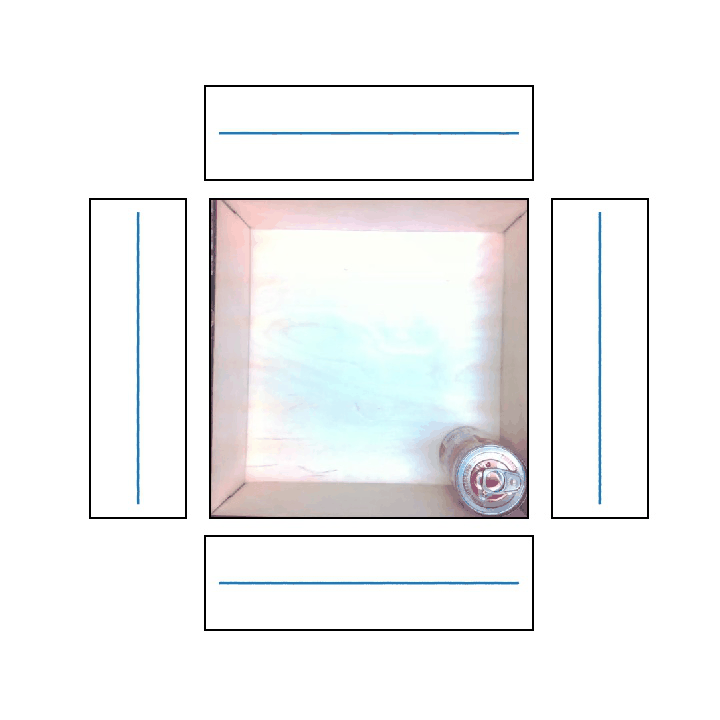

In [28]:
data_folder = dataset_folder
for _ in range(3):
    data_folder = os.path.join(data_folder, random.choice(os.listdir(data_folder)))

path = os.path.join('.tmp', str(int(time.time())))
gif_file_name = 'tmp.gif'

os.makedirs(path)

# load rgb data list
rgb_img_list = glob.glob(os.path.join(data_folder, 'rgb', '*.jpg'))
rgb_img_list.sort()

# load audio data
with open(os.path.join(data_folder, 'audio_data.pkl'), 'rb') as f:
    data = pkl.load(f)
    
audio_data = data['audio']
audio_hz = data['audio_samplerate']

# plot things 
plt.rcParams['figure.figsize'] = [4, 4]
size = 5

audio_range = int(audio_hz * 4.0 / len(rgb_img_list))
audio_dt = int(audio_data.shape[0] / len(rgb_img_list))

linewidth = 1

for i in range(len(rgb_img_list)):
    fig = plt.figure()
    ax1 = plt.subplot2grid((size, size), (0, 1), colspan=size-2)
    ax1.set_xticks([])
    ax1.set_yticks([])
    plt.plot(range(audio_range), audio_data[audio_dt*i: audio_dt*i + audio_range,2], linewidth = linewidth)
    plt.ylim([-1,1])
    

    ax2 = plt.subplot2grid((size, size), (1, 1), rowspan=size-2, colspan=size-2)
    ax2.set_xticks([])
    ax2.set_yticks([])
    img = cv2.cvtColor(cv2.imread(rgb_img_list[i]), cv2.COLOR_BGR2RGB)
    plt.imshow(img[:,320-240:320+240,:])

    ax3 = plt.subplot2grid((size, size), (1, 0),  rowspan=size-2)
    ax3.set_xticks([])
    ax3.set_yticks([])
    plt.plot(audio_data[audio_dt*i: audio_dt*i + audio_range,1], range(audio_range), linewidth = linewidth)
    plt.xlim([-1,1])


    ax4 = plt.subplot2grid((size, size), (size-1, 1), colspan=size-2)
    ax4.set_xticks([])
    ax4.set_yticks([])
    plt.plot(range(audio_range), audio_data[audio_dt*i: audio_dt*i + audio_range,0], linewidth = linewidth)
    plt.ylim([-1,1])


    ax5 = plt.subplot2grid((size, size), (1,size-1 ), rowspan=size-2)
    ax5.set_xticks([])
    ax5.set_yticks([])
    plt.plot(audio_data[audio_dt*i: audio_dt*i + audio_range,3], range(audio_range), linewidth = linewidth)
    plt.xlim([-1,1])
    
    img = get_img_from_fig(fig)
    cv2.imwrite(os.path.join(path, '_tmp_%04d.jpg' % i), img)
    plt.close()

make_gif(path, gif_file_name)

with open('tmp.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

os.rmdir(path)
os.remove(gif_file_name)